```{margin}
<center><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Leonhard_Euler_-_edit1.jpg/800px-Leonhard_Euler_-_edit1.jpg width=100>

Leonhard Euler (1707-1783), éminent scientifique suisse
</center>
```
# TP 4 : Résolution d'équation différentielle par la méthode d'Euler

> La méthode d'Euler permet d'approximer une solution d'une équation différentielle.  
> Dans le TP, nous nous restreignons à une équation différentielle d'ordre $1$, c'est-à-dire où seules apparaissent des dérivées premières.

Commencez par importer les modules nécessaires :

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15, 8)

## Équation différentielle d'ordre 1

### Cadre général

Considérons une équation différentielle d'ordre 1 :

\begin{align*}
    y'(t)& = f(t, y(t))\\
    y(t_0)& = y_0
\end{align*}

- $y$ est la **fonction inconnue** : on cherche à détermine la valeur de $y(t)$ pour $t \in I$, où $I \subseteq \mathbb{R}$ est l'intervalle de définition de $y$.
- $f$ est l'expression qui apparaît dans le **second membre** de l'équation différentielle, qui peut utiliser $t$ et $y(t)$ (d'où une fonction de $2$ variables).  
- $y(t_0) = y_0$ est la condition initiale, garantissant l'unicité de la solution (théorème de Cauchy).

On cherche donc une fonction $y$ définie sur un intervalle $I$ telle que : 

$$
    \forall t \in I, \quad y'(t) = f(t, y(t))
$$

### Exemples d'équations différentielles 

Voici des exemples d'équations différentielles classiques avec la valeur correspondante de $f(t, y)$ :

| Équation différentielle | Second membre $f(t, y)$ | Solution |
|:-----------------------:|:-----------------------:|:----------------------:|
| $y'(t) = t$ <br> $y(0) = 0$  | $f(t, y) = t$ | $y(t) = \frac{t^2}{2}$ |
| $y'(t) = y(t)$ <br> $y(0) = 1$ | $f(t, y) = y$ | $y(t) = e^t$ |
| $y'(t) = \ln(t)$ <br> $y(1) = -1$ | $f(t, y) = \ln(t)$ | $y(t) = t\ln(t) - t$ |

````{admonition} Exercice
 Quelle fonction $f$ utiliser pour mettre l'équation différentielle $y'(t) = t^3 - y(t)^3$ sous la forme $y'(t) = f(t, y(t))$ ? Définir cette fonction en Python :

```python
def f(t, y):
    return ... # utiliser y plutôt que y(t) ici
```
````

## Méthode d'Euler

### Théorie

````{margin}
```{admonition} Rappel
$$
    y'(t) = f(t, y(t))
$$
$$
    y(t_0) = y_0
$$
```
````

La méthode d'Euler calcule des approximations de $y$ de proche en proche. La valeur de $y(t_0) = y_0$ est connue (condition intiale).  
Soit $h$ un petit réel (par exemple $0.01$) le **pas d'approximation** de la méthode d'Euler.  

Alors, par développement limité d'ordre $1$ :

$$
    y(t_0 + h) \approx y(t_0) + h y'(t_0) = y_0 + h y'(t_0)
$$

Comme $y$ vérifie l'équation différentielle $y'(t_0) = f(t_0, y(t_0))$ :

$$
    y(t_0 + h) \approx y_0 + hf(t_0, y(t_0))
$$
Ainsi, on peut approximer $y(t_0 + h)$ par $y_1 = y_0 + hf(t_0, y(t_0))$.  

De même, on peut approximer $y(t_0 + 2h)$ par $y_1 + hf(t_0 + h, y_1)$, et ainsi de suite... Ce qui permet de définir des approximations $y_k \approx y(t_0 + kh)$ par la formule de récurrence suivante :

$$
    \boxed{y_{k + 1} = y_k + h f(t_k, y_k)}
$$

Où $t_k = t_0 + kh$.

**Remarque** : Cette dernière formule n'est autre que l'expression bien connue en physique $y(t + \Delta t) \approx y(t) + \Delta t \times y'(t)$, où on a remplacé $y'(t)$ par le second membre de l'équation différentielle.

### Illustration

On obtient chaque point d’approximation en se déplaçant de $\Delta t$ le long de la tangente à $y$ :

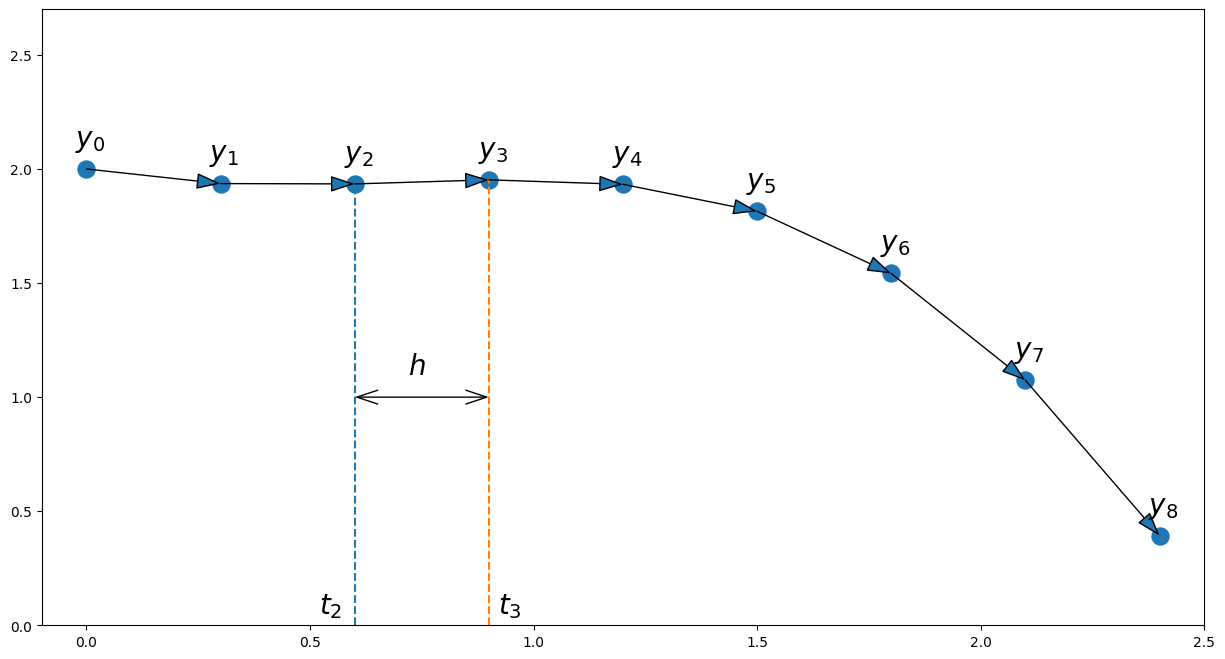

In [7]:
def f(t, y):
    return np.cos(t)*t - 0.5

def arrow(p1, p2, double=False):
    a = "<->" if double else "-|>"
    plt.annotate("", 
        xytext=p1, 
        xy=p2, 
        arrowprops=dict(arrowstyle=f"{a},head_width=.5,head_length=1.5", 
            shrinkA=0,shrinkB=0))

t = [0]
y = [2]
h = 0.3
plt.axis([-0.1, 2.5, 0, 2.7])
for _ in range(10):
    t.append(t[-1] + h)
    y.append(y[-1] + h*f(t[-1], y[-1]))
    arrow((t[-2], y[-2]), (t[-1], y[-1]))

plt.scatter(t, y, s=150)
for i in range(len(t) - 1):
    plt.annotate(f"$y_{i}$", (t[i] - 0.025, y[i] + 0.1), fontsize=20)

plt.plot((t[2], t[2]), (0, y[2]), '--')
plt.plot((t[3], t[3]), (0, y[3]), '--')
plt.annotate("$t_2$", (t[2]-.08, 0.05), fontsize=20)
plt.annotate("$t_3$", (t[3]+.02, 0.05), fontsize=20)
plt.annotate(f"$y_{i}$", (t[i] - 0.025, y[i] + 0.1), fontsize=20)

arrow((t[2], 1), (t[3], 1), True)
plt.annotate("$h$", (t[2] + .4*h, 1.1), fontsize=20)

plt.show()

### Programmation

On calcule les approximations $y_k$ de $y$ en appliquant l'équation de récurrence $y_{k + 1} = y_k + h f(t_k, y_k)$ dans une boucle `for`.  
Les approximations $y_k$ seront stockées dans une liste $y$ et les temps $t_k$ dans une liste $t$.

Voici un exemple d'équation différentielle avec le calcul des approximations par la méthode d'Euler :

\begin{align*}
    y'(t)& = y(t)\\
    y(0)& = 1
\end{align*}

In [8]:
y = [1] # la première approximation est la condition initiale
t = [0] # temps initial
h = 0.01 # pas d'approximation
n = 200 # nombre d'approximations

for k in range(n):
    t.append(t[-1] + h)
    y.append(y[-1] + h*y[-1]) # équation de récurrence

En fait, on connaît la solution exacte de l'équation différentielle : $y(t) = e^t$. On peut donc comparer l'approximation avec la valeur exacte :

In [9]:
y[50] # approximation de exp(50*h) = exp(0.5)

1.644631821843882

In [10]:
np.exp(0.5)

1.6487212707001282

L'approximation est effectivement assez proche de la solution. Plus $h$ est petit, plus l'approximation est bonne mais plus cela prend du temps pour l'ordinateur.

````{admonition} Exercice
 Quelle approximation de $e^1$ a été trouvée ? Comparer avec la vraie valeur.
````

On a calculé $n = 200$ approximations de l'équation différentielle $y'(t) = y(t)$. Comme $h = 0.01$, le dernier temps d'approximation est donc $0 + n\times h = 2$.

````{admonition} Exercice
 Quel $n$ choisir pour approximer la solution sur $[0, 10]$ ?
````

````{admonition} Exercice
 De manière générale, donner la valeur de $n$ à choisir pour approximer une solution d'une équation différentielle sur un intervalle $[a, b]$ avec un pas de $h$.
````

### Affichage des approximations

On peut afficher l'approximation obtenue, et la comparer avec la fonction exponentielle :

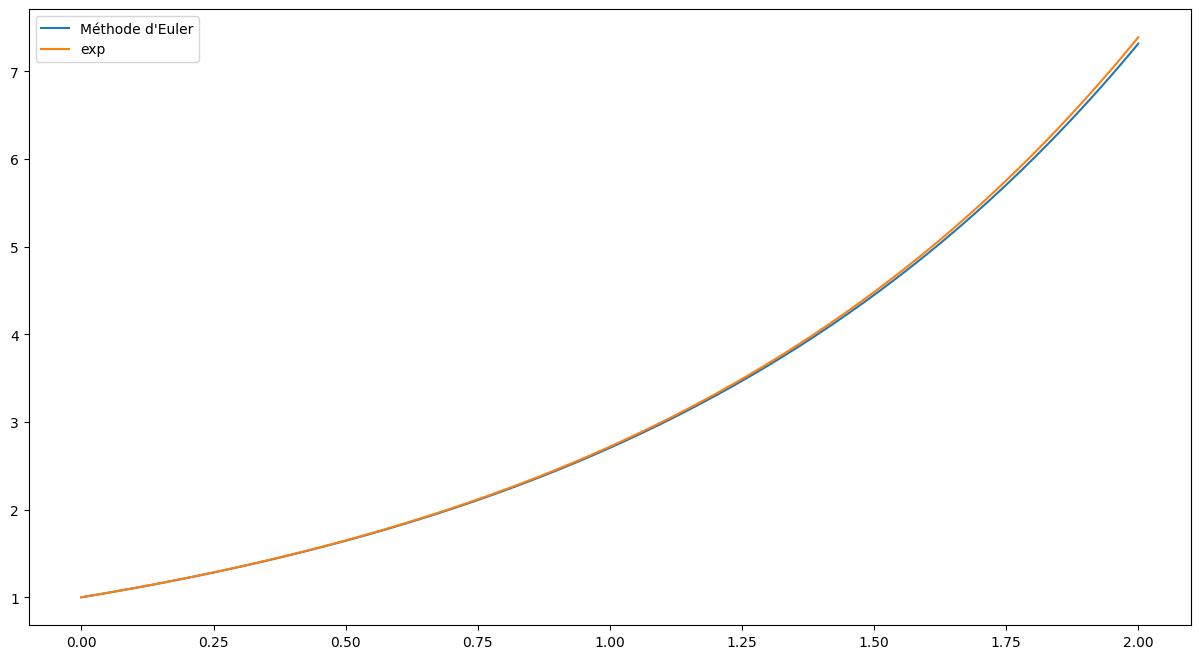

In [8]:
plt.plot(t, y, label="Méthode d'Euler")
plt.plot(t, np.exp(t), label="exp")
plt.legend()
plt.show()

```{note}
Si `x` et `y` sont deux listes, `plt.plot(x, y)` relie les points dont les abscisses sont dans `x` et les ordonnées dans `y`, ce qui revient à afficher `y` en fonction de `x`.
```

````{admonition} Exercice
 Afficher la courbe d'une soluton approchée de $y'(t) = y(t)$ sur l'intervalle $[0, 3]$ (au lieu de $[0, 2]$ comme dans le dessin ci-dessus).
````

````{admonition} Exercice
 

Résoudre de façon approchée l'équation différentielle ci-dessous, sur $[-1, 4]$, puis afficher la solution obtenue.

\begin{align*}
    y'(t)& = t^3 - y(t)^3\\
    y(-1)& = -3
\end{align*}

On pourra adapter le code précédent ci-dessous.  
Vous devez obtenir un dessin ressemblant à :

![output](./output.png)
````

In [ ]:
y = [...] # on met initialement la condition initiale
t = [...] # temps initial
h = 0.01 # pas d'approximation
n = ... # nombre d'approximations

for k in range(n):
    t.append(t[-1] + h)
    y.append(y[-1] + h*...) # équation de récurrence, où il faut remplacer ... par le membre droit de l'équa diff

## Méthode d'Euler générique

La fonction suivante permet d'appliquer la méthode d'Euler avec les paramètres suivants :
- `f` : fonction apparaissant dans le membre droit de l'équation différentielle.
- `t0` : temps initial.
- `y0` : valeur de la solution en `t0` (condition initiale).
- `h` : pas de l'approximation.
- `n` : nombre d'approximations à calculer.

In [11]:
def euler(f, t0, y0, h, n):
    y = [y0]
    t = [t0]
    for k in range(n):
        t.append(t[-1] + h)
        y.append(y[-1] + h*f(t[-1], y[-1]))
    return t, y

`f` doit être définie comme une fonction classique en Python (avec `def ...`). On peut passer une fonction en argument à une autre fonction.  

Par exemple, pour approcher une solution de $y'(t) = y(t)$ avec `euler` :

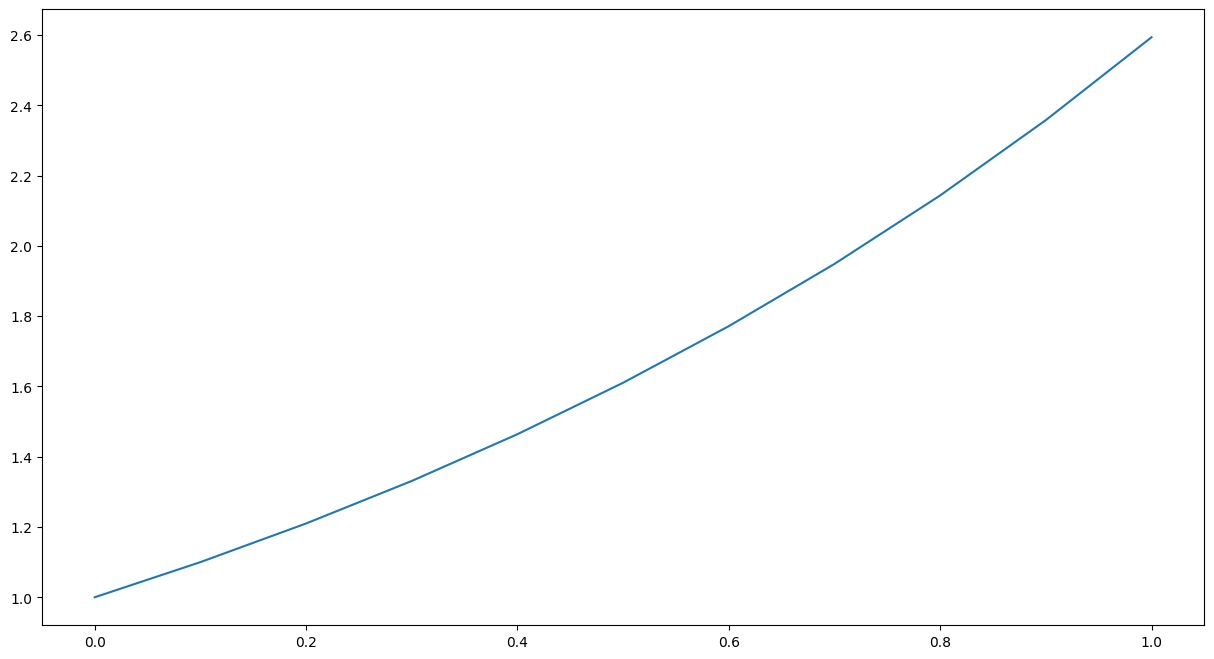

In [12]:
def f(t, y):
    return y

t, y = euler(f, 0, 1, 0.1, 10)
plt.plot(t, y)
plt.show()

````{admonition} Exercice
 Dessiner des approximations de l'équation $y'(t) = t^3 - y(t)^3$ avec différentes conditions initiales : $y_0 = -3, y_0 = -2, y_0 = 0, y_0 = 4$.  
On pourra utiliser `euler` dans une boucle `for` avec différentes valeurs de `y_0` et utiliser `plt.show()` une seule fois, à la fin (après le `for`). Par exemple :  
```python
for y0 in [-3, -2, 0, 4]:
    ... # méthode d'Euler avec y0 comme condition initiale
```

Vous devez obtenir ce genre de dessin :  
![](./output2.png)
````

## Système d'équations différentielles

Il est également possible de résoudre un système d'équation différentielles.  

### Réactions chimiques

Par exemple, considérons deux réactions chimiques d'ordre 1 :
$$A \stackrel{\alpha}{\longrightarrow} B$$
$$B \stackrel{\beta}{\longrightarrow} C$$
	
Les concentrations au cours du temps vérifient :

\begin{align*}
    \frac{d[A]}{dt}& = -\alpha [A] \\
    \frac{d[B]}{dt}& = \alpha [A] - \beta [B]\\
    \frac{d[C]}{dt}& = \beta [B]
\end{align*}

$$
    [A]_0 = 1, [B]_0 = 0, [C]_0 = 0
$$

Dans ce cas, on applique la méthode d'Euler sur chaque équation différentielle :

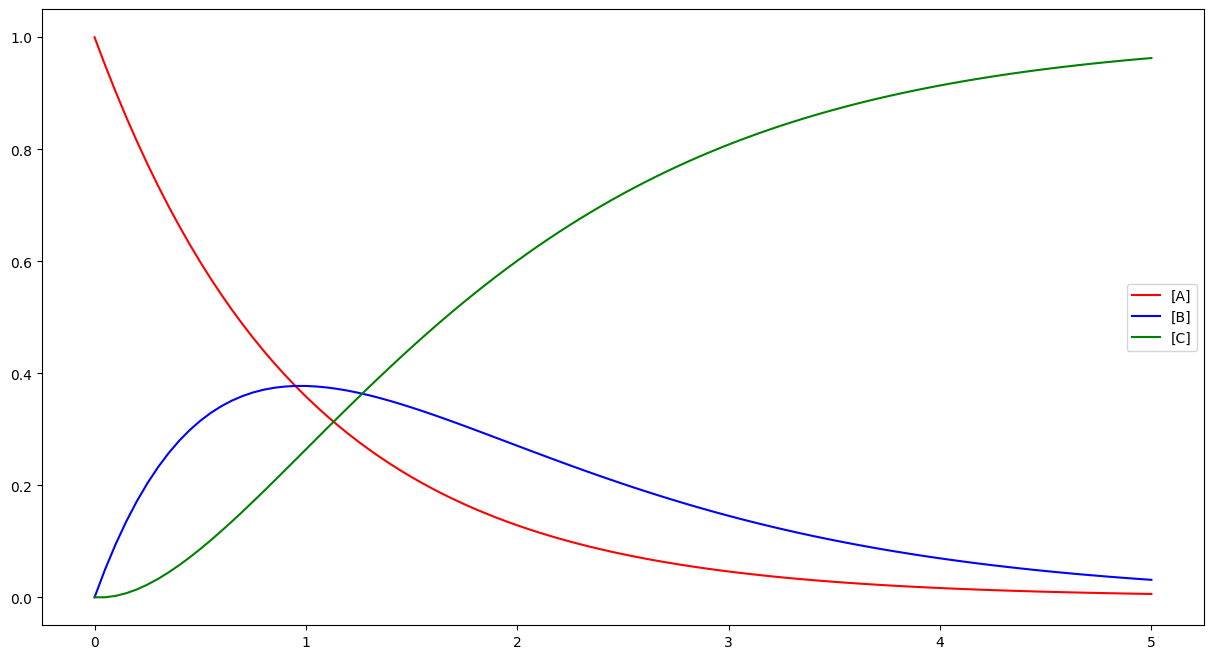

In [14]:
h = 0.05
t = [0]
A = [1]
B = [0]
C = [0]
for k in range(100): # approximations sur [0, 5]
    t.append(t[k] + h)
    A.append(A[k] + h*(-A[k])) # application de la méthode d'Euler sur chaque équation
    B.append(B[k] + h*(A[k] - B[k]))
    C.append(C[k] + h*B[k])

plt.plot(t, A, 'r', label="[A]")
plt.plot(t, B, 'b', label="[B]")
plt.plot(t, C, 'g', label="[C]")
plt.legend()
plt.show()

````{admonition} Exercice
 Interpréter le dessin ci-dessus.
````

### Évolution de population (Lokta-Volterra)

Le système différentiel de Lotka-Volterra permet de modéliser l'évolution conjointe de populations de proies et de prédateurs :

\begin{align*}
    x'(t)& = x(t) \, \bigl(\alpha - \beta \, y(t) \bigr) \\
    y'(t)& = y(t) \, \bigl(\delta \, x(t) - \gamma \bigr)
\end{align*}
 
- $x(t)$ : la population de proies au temps $t$;
- $y(t)$ : la population de prédateurs au temps $t$;
- $\alpha$ : le taux de reproduction des proies indépendamment des prédateurs rencontrés;
- $\beta$ : le taux de mortalité des proies dues aux prédateurs rencontrés;
- $\gamma$ : le taux de mortalité des prédateurs indépendamment du nombre de proies
- $\delta$ : le taux de reproduction des prédateurs en fonction des proies mangées.

````{admonition} Exercice
 
1. Écrire les équations de récurrences vérifiées par les approximations $x_k$ et $y_k$ de la méthode d'Euler, appliquée au système différentiel ci-dessus.
1. Écrire des instructions Python pour stocker dans des listes `t`, `x` et `y` ces $t_k$, $x_k$ et $y_k$. On choisira l'intervalle de temps et le nombre d'approximations judicieusement et on prendra $\alpha = \beta = \gamma = \delta = 1$.
1. Afficher $y$ en fonction de $x$ et interpréter.
1. Afficher $y$ en fonction de $t$ et $x$ en fonction de $t$, sur le même dessin et interpréter.
1. Essayer de modifier les constantes $\alpha$, $\beta$...
````

## Équation du second ordre

Pour résoudre une équation différentielle d'ordre 2 du type $y'' = f(t, y, y')$, on peut poser $z(t) = y'(t)$ pour se ramener à un système de 2 équations différentielles d'ordre 1 dont les inconnues sont $y$ et $z$.

Par exemple, calculons une solution approchée de l'équation du pendule linéarise :

$$
    \theta''(t) = -\theta(t)
$$

Cette équation est du second ordre, donc on ne peut pas appliquer directement la méthode d'Euler.  
Par contre, si on pose $z(t) = \theta'(t)$ alors, comme $z'(t) = \theta''(t) = -\theta(t)$ (d'après {eq}`pendule`) on peut réécrire cette équation du second ordre comme deux équations du premier ordre :

\begin{align*}
    \theta'(t)& = z(t)\\
    z'(t)& = -\theta(t)
\end{align*}

On applique alors la méthode d'Euler sur chaque équation, comme dans la section précédente :

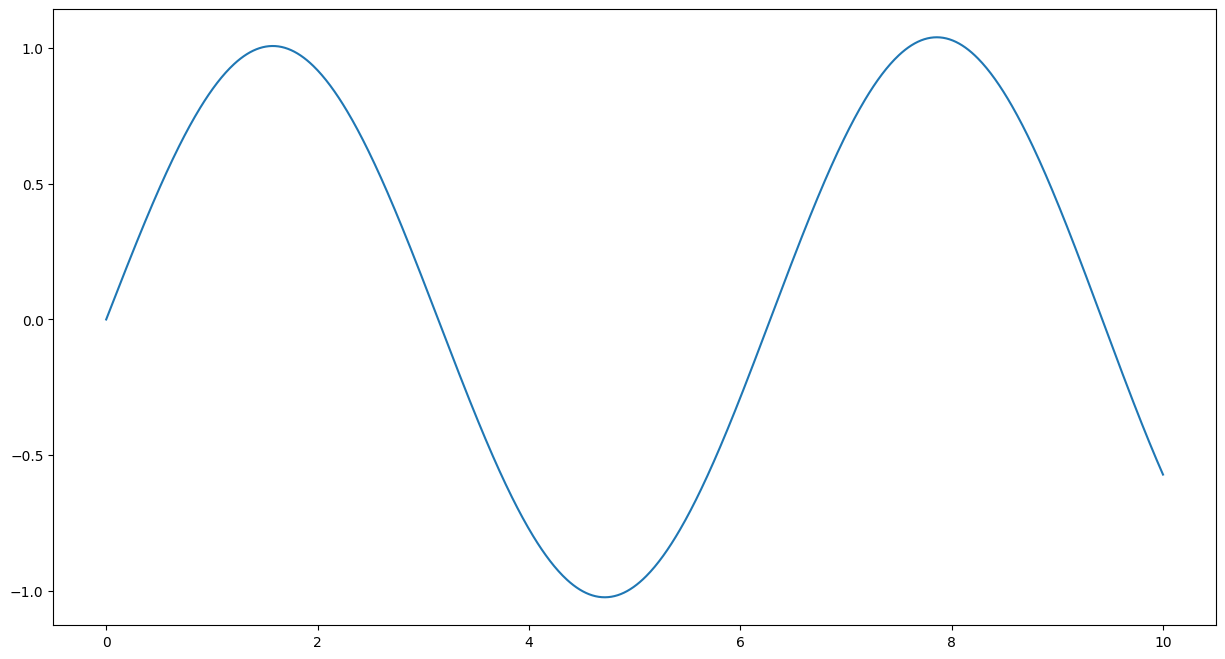

In [16]:
h = 0.01
theta = [0]
z = [1]
t = [0]

for k in range(1000):
    t.append(t[k] + h)
    theta.append(theta[k] + h*z[k])
    z.append(z[k] - h*theta[k])

plt.plot(t, theta)
plt.show()

````{admonition} Exercice
 Quelle est la courbe obtenue ?
````

````{admonition} Exercice
 Adapter la résolution ci-dessus pour l'équation du pendule non-linéarise $\theta''(t) = -\sin(\theta(t))$. Interpréter le dessin.
````